In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pandas_profiling
import folium
from folium import plugins

In [2]:
products = pd.read_csv('products.csv')
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [3]:
orders = pd.read_csv('orders.csv')
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0
...,...,...,...,...,...,...
3421078,2266710,206209,10,5,18,29.0
3421079,1854736,206209,11,4,10,30.0
3421080,626363,206209,12,1,12,18.0
3421081,2977660,206209,13,1,12,7.0


In [4]:
order_products = pd.read_csv('order_products.csv')
order_products

,order_id,product_id,add_to_cart_order
0,2,33120,1
1,2,28985,2
2,2,9327,3
3,2,45918,4
4,2,30035,5
...,...,...,...
33819101,3421063,14233,3
33819102,3421063,35548,4
33819103,3421070,35951,1
33819104,3421070,16953,2


In [5]:
departments = pd.read_csv('departments.csv')
departments
#departments.info()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [6]:
aisles = pd.read_csv('aisles.csv')
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [7]:
join_table=pd.merge(order_products,orders,on=['order_id'])

In [8]:
join_table1=pd.merge(join_table,products,on=['product_id'])

In [9]:
join_table2=pd.merge(join_table1,aisles,on=['aisle_id'])

In [10]:
join_table3=pd.merge(join_table2,departments,on=['department_id'])
join_table3
#add_to_cart_order加入购物车的顺序 
#order_number一个user名下的单号的顺序
#order——dow day of week 一周中第几天下的单

,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,153404,2,0,16,7.0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,23750,11,6,8,10.0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,58707,21,6,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,166654,48,0,12,9.0,Organic Egg Whites,86,16,eggs,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,2909991,18001,5,80613,10,0,11,2.0,Dried Porcini Mushroom,6,2,other,other
33819102,3016581,46404,1,132609,8,5,14,2.0,Cotes De Provence Rose,6,2,other,other
33819103,3326955,46404,1,132609,7,3,15,2.0,Cotes De Provence Rose,6,2,other,other
33819104,3340423,46404,3,103807,12,6,14,4.0,Cotes De Provence Rose,6,2,other,other


In [17]:
new_data=join_table3[['user_id','aisle','order_id']]

In [18]:
pivot = pd.pivot_table(new_data,index=[u'user_id'],columns=[u'aisle'],values=[u'order_id'],aggfunc=[np.size])
pivot

size                               \
                      order_id                                
aisle   air fresheners candles asian foods baby accessories   
user_id                                                       
1                          NaN         NaN              NaN   
2                          NaN         3.0              NaN   
3                          NaN         NaN              NaN   
4                          NaN         NaN              NaN   
5                          1.0         4.0              NaN   
...                        ...         ...              ...   
206205                     NaN         NaN              1.0   
206206                     NaN         4.0              NaN   
206207                     NaN         NaN              NaN   
206208                     NaN         3.0              NaN   
206209                     NaN         1.0              NaN   

                                                               \
                                                                
aisle   baby bath body care baby food formula bakery desserts   
user_id                                                         
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   
5                       NaN               NaN             NaN   
...                     ...               ...             ...   
206205                  NaN               NaN             NaN   
206206                  NaN               NaN             NaN   
206207                  NaN               1.0             NaN   
206208                  NaN               3.0             NaN   
206209                  NaN               NaN             NaN   

                                                                       ...  \
                                                                       ...   
aisle   baking ingredients baking supplies decor beauty beers coolers  ...   
user_id                                                                ...   
1                      NaN                   NaN    NaN           NaN  ...   
2                      2.0                   NaN    NaN           NaN  ...   
3                      NaN                   NaN    NaN           NaN  ...   
4                      NaN                   NaN    NaN           NaN  ...   
5                      NaN                   NaN    NaN           NaN  ...   
...                    ...                   ...    ...           ...  ...   
206205                 NaN                   NaN    NaN           NaN  ...   
206206                 4.0                   1.0    NaN           NaN  ...   
206207                 NaN                   NaN    NaN           NaN  ...   
206208                 4.0                   NaN    NaN           NaN  ...   
206209                 NaN                   NaN    NaN           NaN  ...   

                                                                  \
                                                                   
aisle   spreads  tea tofu meat alternatives tortillas flat bread   
user_id                                                            
1           1.0  NaN                    NaN                  NaN   
2           3.0  1.0                    1.0                  NaN   
3           4.0  1.0                    NaN                  NaN   
4           NaN  NaN                    NaN                  1.0   
5           NaN  NaN                    NaN                  NaN   
...         ...  ...                    ...                  ...   
206205      NaN  NaN                    NaN                  NaN   
206206      1.0  NaN                    NaN                  NaN   
206207      3.0  4.0                    NaN                  2.0   
206208      5.0  NaN                    NaN      

In [27]:
pivot1 = pivot.fillna(0)

In [32]:
from sklearn import preprocessing
X=pivot1.values[:,1:]
x_scaled = preprocessing.scale(X)

In [36]:
wcss = []

for i in range(1, 30):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[27425797.000000797,
 25157470.85929169,
 24554524.57175797,
 24195290.976956375,
 23952505.54674445,
 23721206.73856793,
 23562699.705786467,
 23361007.346482735,
 23223677.749031268,
 23112513.583003346,
 22992192.580359295,
 22910098.44847119,
 22794095.685106196,
 22706516.475878328,
 22628302.098809145,
 22496390.865067564,
 22418532.948202867,
 22347844.84560426,
 22285640.336295307,
 22182413.26841195,
 22096460.196014658,
 22049493.747497108,
 21884152.101068463,
 21860547.976659857,
 21761752.117819738,
 21692159.292058222,
 21596485.017742068,
 21539954.85970325,
 21448520.623918653]

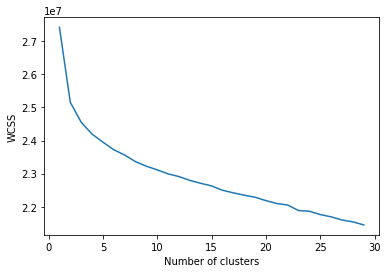

In [37]:
plt.plot(range(1,30), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
from sklearn.cluster import KMeans
kmeans_new = KMeans(4)
kmeans.fit(x_scaled)
cluster_new = pivot1.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new

size                               \
                      order_id                                
aisle   air fresheners candles asian foods baby accessories   
user_id                                                       
1                          0.0         0.0              0.0   
2                          0.0         3.0              0.0   
3                          0.0         0.0              0.0   
4                          0.0         0.0              0.0   
5                          1.0         4.0              0.0   
...                        ...         ...              ...   
206205                     0.0         0.0              1.0   
206206                     0.0         4.0              0.0   
206207                     0.0         0.0              0.0   
206208                     0.0         3.0              0.0   
206209                     0.0         1.0              0.0   

                                                               \
                                                                
aisle   baby bath body care baby food formula bakery desserts   
user_id                                                         
1                       0.0               0.0             0.0   
2                       0.0               0.0             0.0   
3                       0.0               0.0             0.0   
4                       0.0               0.0             0.0   
5                       0.0               0.0             0.0   
...                     ...               ...             ...   
206205                  0.0               0.0             0.0   
206206                  0.0               0.0             0.0   
206207                  0.0               1.0             0.0   
206208                  0.0               3.0             0.0   
206209                  0.0               0.0             0.0   

                                                                       ...  \
                                                                       ...   
aisle   baking ingredients baking supplies decor beauty beers coolers  ...   
user_id                                                                ...   
1                      0.0                   0.0    0.0           0.0  ...   
2                      2.0                   0.0    0.0           0.0  ...   
3                      0.0                   0.0    0.0           0.0  ...   
4                      0.0                   0.0    0.0           0.0  ...   
5                      0.0                   0.0    0.0           0.0  ...   
...                    ...                   ...    ...           ...  ...   
206205                 0.0                   0.0    0.0           0.0  ...   
206206                 4.0                   1.0    0.0           0.0  ...   
206207                 0.0                   0.0    0.0           0.0  ...   
206208                 4.0                   0.0    0.0           0.0  ...   
206209                 0.0                   0.0    0.0           0.0  ...   

                                                                              \
                                                                               
aisle    tea tofu meat alternatives tortillas flat bread trail mix snack mix   
user_id                                                                        
1        0.0                    0.0                  0.0                 0.0   
2        1.0                    1.0                  0.0                 0.0   
3        1.0                    0.0                  0.0                 0.0   
4        0.0                    0.0                  1.0                 0.0   
5        0.0                    0.0                  0.0                 0.0   
...      ...                    ...                  ...                 ...   
206205   0.0                    0.0                  0.0                 0.0   
206206   0.0                    0.0                  